In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt

# Importing dataset, checking for data, data types,  Typecasting and dropping not required columns

In [51]:
df1 = pd.read_csv(r"C:\Users\ASUS\Desktop\GFG Bootcamp\00. Projects\Sugarcane Production Dataset.csv")

In [52]:
df1.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [53]:
df1.shape

(103, 7)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


<B> To remove dots and commas from the numeric columns

In [55]:
# Setting up a function

def dot_comma_replace(x):
    return x.replace(".","").replace(",",".")

In [56]:
# Converting each numerical column to string, so we can apply our 'dot_comma_replace' function

df1["Production (Tons)"]          = df1["Production (Tons)"].astype('str')
df1["Production per Person (Kg)"] = df1["Production per Person (Kg)"].astype('str')
df1["Acreage (Hectare)"]          = df1["Acreage (Hectare)"].astype('str')
df1["Yield (Kg / Hectare)"]       = df1["Yield (Kg / Hectare)"].astype('str')


In [57]:
df1.dtypes

Unnamed: 0                     int64
Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [58]:
# Removing dots and commas from numeric columns

df1["Production (Tons)"]          = df1["Production (Tons)"].apply(dot_comma_replace)
df1["Production per Person (Kg)"] = df1["Production per Person (Kg)"].apply(dot_comma_replace)
df1["Acreage (Hectare)"]          = df1["Acreage (Hectare)"].apply(dot_comma_replace)
df1["Yield (Kg / Hectare)"]       = df1["Yield (Kg / Hectare)"].apply(dot_comma_replace)


In [59]:
# Changing the Data type

df1["Production (Tons)"]          = df1["Production (Tons)"].astype('float')
df1["Production per Person (Kg)"] = df1["Production per Person (Kg)"].astype('float')
df1["Acreage (Hectare)"]          = df1["Acreage (Hectare)"].astype('float')
df1["Yield (Kg / Hectare)"]       = df1["Yield (Kg / Hectare)"].astype('float')

In [60]:
df1.dtypes

Unnamed: 0                      int64
Country                        object
Continent                      object
Production (Tons)             float64
Production per Person (Kg)    float64
Acreage (Hectare)             float64
Yield (Kg / Hectare)          float64
dtype: object

<B>Finally, our numeric colums has been converted to float type ! Now dropping Unnamed Column1 as it does not have high significance|

In [62]:
df1 = df1.drop("Unnamed: 0", axis = 1)

In [63]:
df1.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


# Handling Duplicates

In [64]:
df1.duplicated().sum()

0

Since there are no duplicate values, we will move formard to missing values

# Missing Values Treatment

## We can do the following in context of missing values -
<B>1. Deleting the Column with missing data<Br></Br>
<B>2. Deleting the row with missing data 
<Br></Br>
<B>3. Imputation methods - <Br></Br>
$\;\;\;\;\;\;\;\;\;$ Mean(numerical data),$\;\;$ Median(numerical + outliers),$\;\;$ Mode(categorical data)<Br></Br>
$\;\;\;\;\;\;\;\;\;$ Random Imputation,$\;\;$ Hot Deck Imputation,$\;\;$ Other(Regression and KNN)

### 1. Deleting the Column with missing data

In [65]:
df_col_drop = df1.copy()

In [66]:
df_col_drop.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [67]:
df_col_drop = df_col_drop.drop("Acreage (Hectare)", axis = 1)
df_col_drop = df_col_drop.drop("Yield (Kg / Hectare)", axis = 1)

In [68]:
df_col_drop.head()

,Country,Continent,Production (Tons),Production per Person (Kg)
0,Brazil,South America,768678382.0,3668.531
1,India,Asia,348448000.0,260721.000
2,China,Asia,123059739.0,88287.000
3,Thailand,Asia,87468496.0,1264.303
4,Pakistan,Asia,65450704.0,324219.000


But this will cost us huge data loss

### 2. Deleting the row with missing data

Naming it as df, as later we will take it forward for analysis

In [87]:
df = df1.copy()

In [88]:
df.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [89]:
df[df["Acreage (Hectare)"].isnull()]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53.0,51.0,NaN,NaN


In [90]:
df[df["Yield (Kg / Hectare)"].isnull()]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53.0,51.0,NaN,NaN


Since, both values are in same row, we just need to delete single row

In [91]:
df = df.dropna().reset_index().drop("index", axis = 1)

In [92]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### 3. Imputation - mean imputation, median imputation

In [96]:
df_mean_impute = df1.copy()

In [97]:
df_mean_impute.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

<B> Mean - Method 1 -  using SimpleImputer fron sklearn library

In [93]:
from sklearn.impute import SimpleImputer

In [99]:
mean_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")

In [108]:
df_mean_impute['Acreage (Hectare)'] = pd.DataFrame(mean_imputer.fit_transform(df_mean_impute[['Acreage (Hectare)']]))

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be rem

<B> Mean - Method 2 -  Directly by .mean() function

In [111]:
# Taking Yield (Kg / Hectare) Column this time

df_mean = df_mean_impute["Yield (Kg / Hectare)"].mean()

In [113]:
df_mean_impute["Yield (Kg / Hectare)"].fillna(df_mean, inplace = True)

In [114]:
df_mean_impute.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             0
Yield (Kg / Hectare)          0
dtype: int64

Similarly, We can do Imputation on Categorica / (Outliers + Numerical data column) by mode and median imputations<Br></Br>We just need to make sure about strategy attribute - <Br></Br>
(i) For Median - (strategy = "median")<Br></Br>
(ii) For Mode - (strategy = "most_frequent")

# Univariate Analysis

In [116]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### How many country produces Sugarcane from each continent?

In [117]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

### Count plot

<Axes: xlabel='Continent', ylabel='Number of countries'>

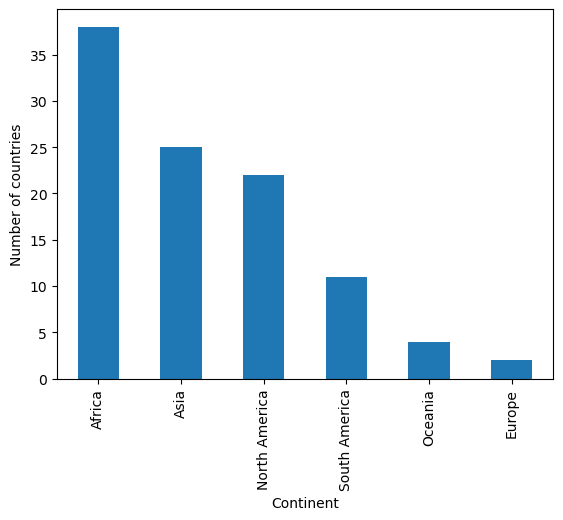

In [121]:
df["Continent"].value_counts().plot(kind = "bar", xlabel = "Continent", ylabel = "Number of countries")

### Distplot

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20136\3741573954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  w

<Axes: xlabel='Production (Tons)', ylabel='Density'>

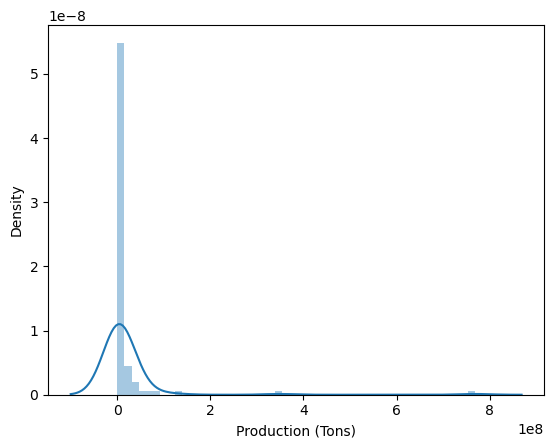

In [122]:

sns.distplot(df["Production (Tons)"])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20136\2979911626.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  w

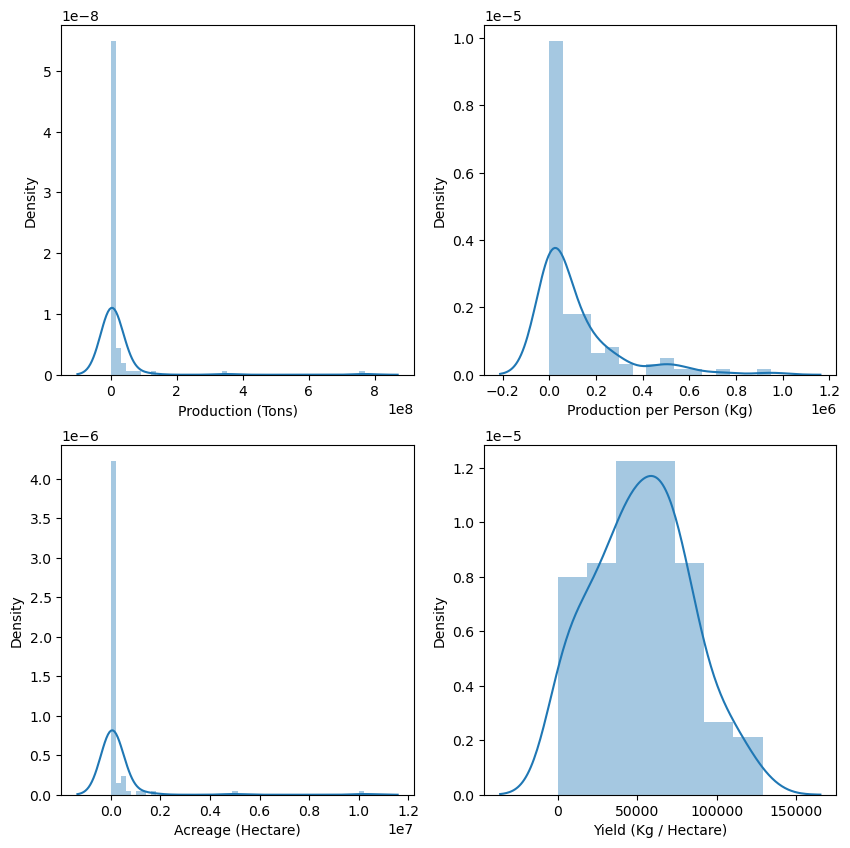

In [131]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])

plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])

plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])

plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

plt.show()

### Distplot by using "Displot" as Distplot will be depreciated

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


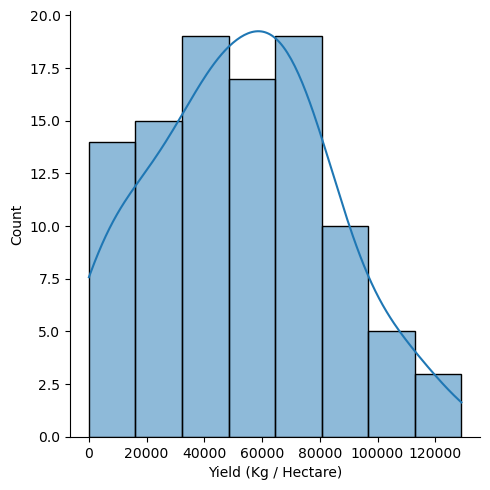

In [144]:
sns.displot(data = df, x = "Yield (Kg / Hectare)", kde = True)

# Checking Outliers

### Boxplots

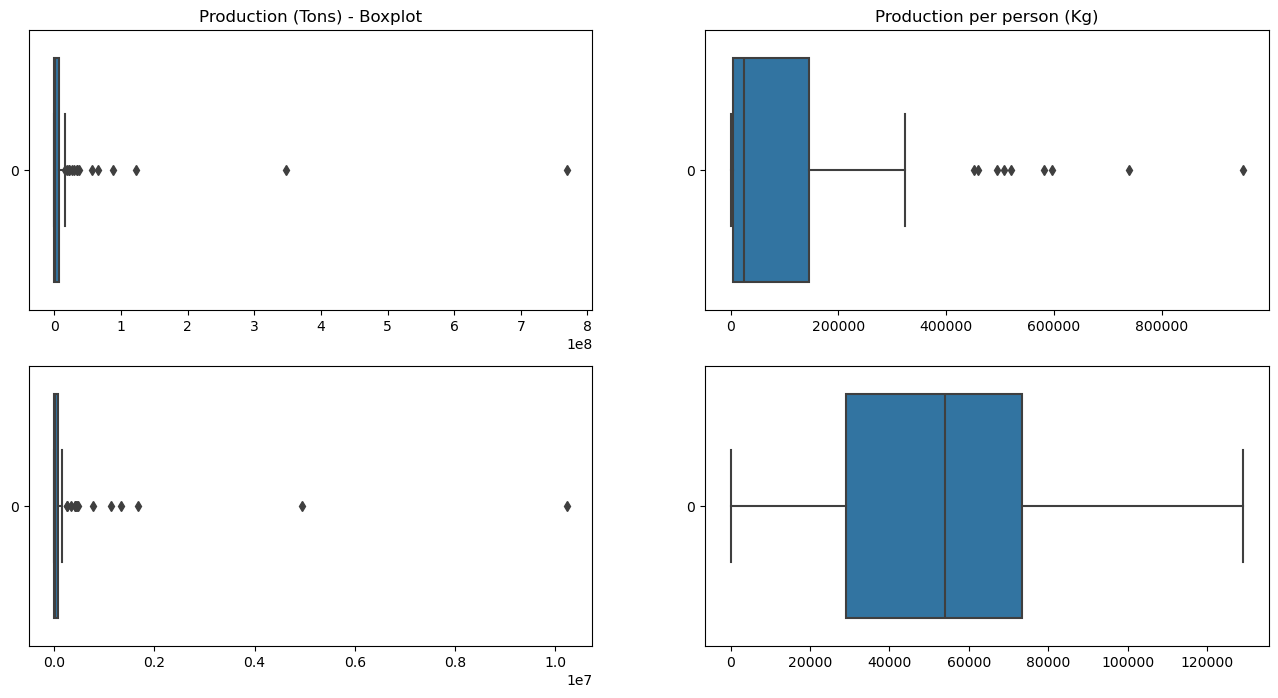

In [141]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
a = sns.boxplot(df["Production (Tons)"], orient = "horizontal")
a.set_title('Production (Tons) - Boxplot')

plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"], orient = "horizontal").set(title = "Production per person (Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"], orient = "horizontal")

plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"], orient = "horizontal")

plt.show()

In [136]:
df.describe()  #Checking for non-visualized infrences

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


# Bivariate Analysis

In [145]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which Country produces maximum Sugarcane?

In [146]:
df_new = df[["Country", "Production (Tons)"]].set_index("Country")

In [147]:
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [149]:
df_new["Production (Tons) by Percentage"] = df_new["Production (Tons)"] * 100 / df_new["Production (Tons)"].sum()

In [150]:
df_new

,Production (Tons),Production (Tons) by Percentage
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


### Pie plot (both methods)

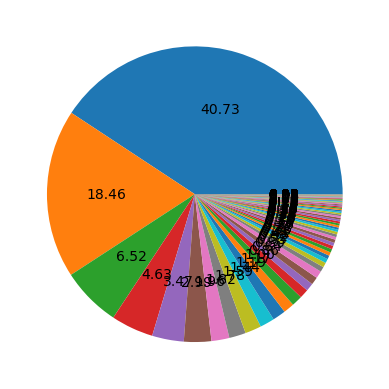

In [156]:
plt.pie(data = df_new, x = "Production (Tons) by Percentage", autopct = "%0.2f")
plt.show()

<Axes: ylabel='Production (Tons) by Percentage'>

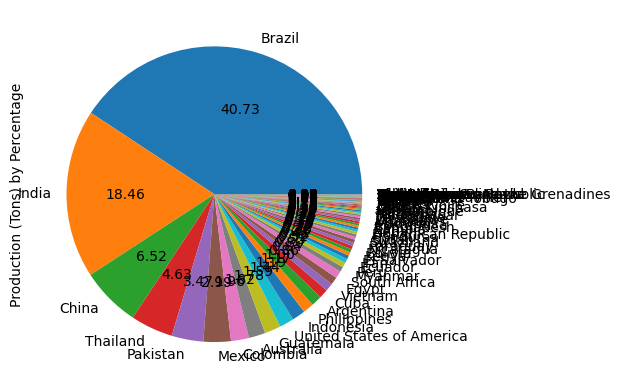

In [158]:
df_new["Production (Tons) by Percentage"].plot(kind = "pie", autopct = "%.2f") 

### Bar plot

<Axes: xlabel='Country'>

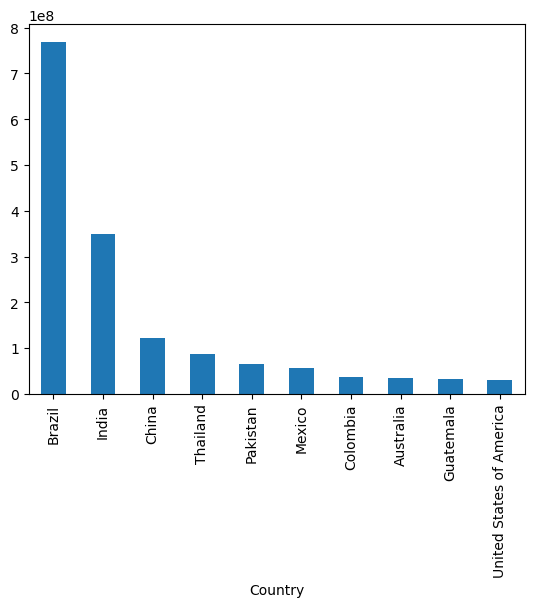

In [163]:
df_new["Production (Tons)"].head(10).plot(kind = "bar")

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


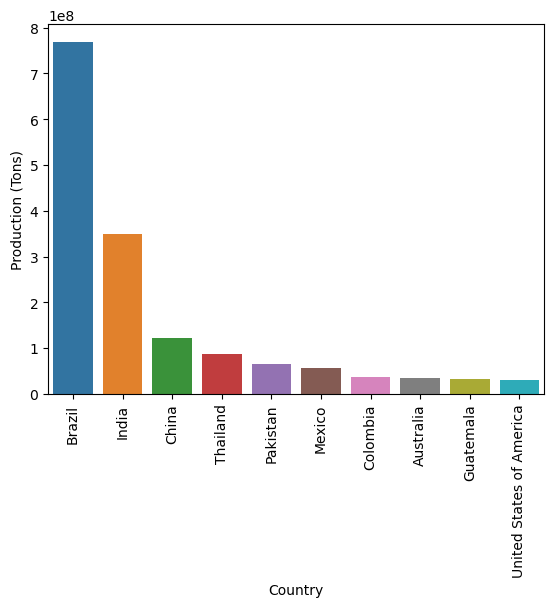

In [178]:
ax = sns.barplot(data = df.head(10), x = "Country", y = "Production (Tons)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

### Which Country has largest land area?

In [189]:
# Sorting Data According to Acreage (Hectare) Column

df_acr = df.sort_values("Acreage (Hectare)", ascending = False)

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


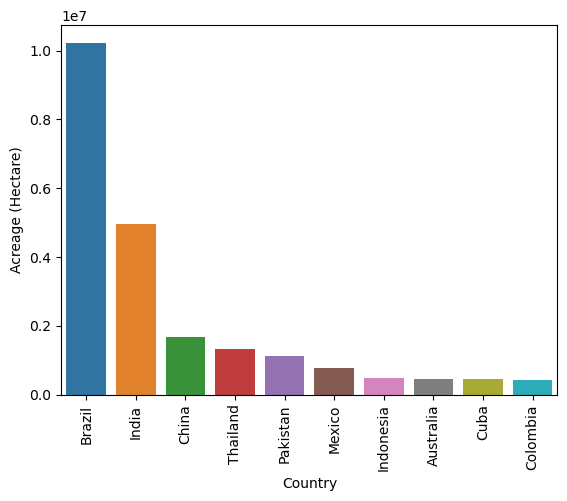

In [190]:
ax = sns.barplot(data = df_acr.head(10), x = "Country", y = "Acreage (Hectare)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

In [179]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


### Which Country has highest yield per hectare?

In [198]:
# Sorting data according to "Yield (Kg / Hectare)" and saving it into new dataframe df_yld

df_yld = df.sort_values("Yield (Kg / Hectare)", ascending = False)

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


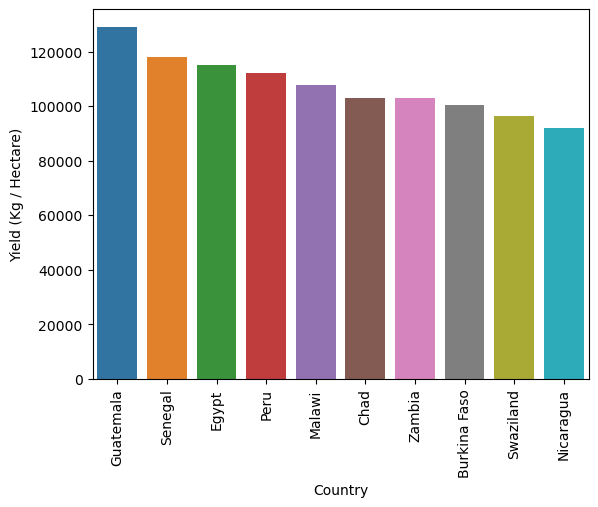

In [199]:
ax = sns.barplot(data = df_yld.head(10), x = "Country", y = "Yield (Kg / Hectare)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

### Which Country has highest production?

In [200]:
# Sorting the data according to highest production

df_high_prod = df.sort_values("Production (Tons)", ascending = False)

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


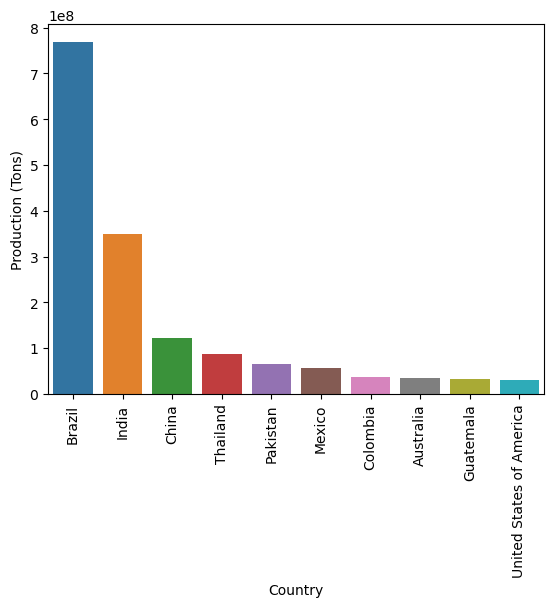

In [202]:
ax = sns.barplot(data = df_high_prod.head(10), x = "Country", y = "Production (Tons)")

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

### Correlation

In [205]:
df.corr(numeric_only = True)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Production (Tons),1.000000,0.015000,0.997550,0.132812
Production per Person (Kg),0.015000,1.000000,0.012557,0.017999
Acreage (Hectare),0.997550,0.012557,1.000000,0.113433
Yield (Kg / Hectare),0.132812,0.017999,0.113433,1.000000


### Do Countries with Highest land produce more sugarcane?

We can check this by heatmaps or scatterplot

<B> Heatmap

In [210]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Axes: >

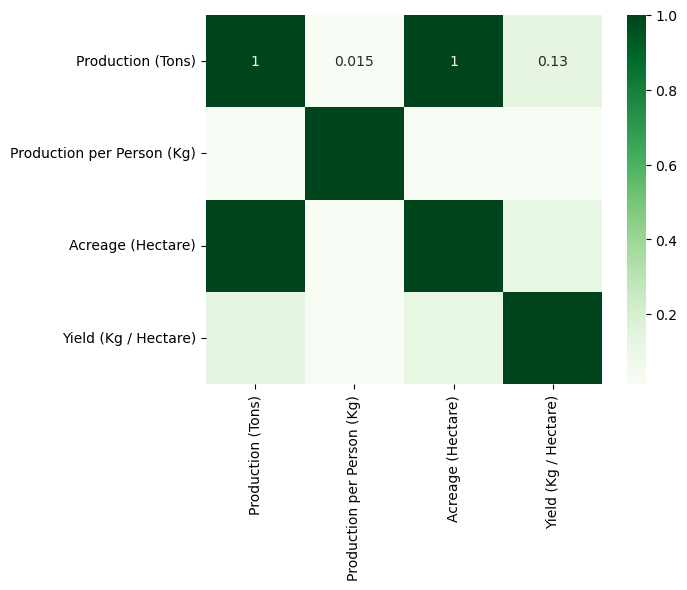

In [214]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "Greens")

<B> Scatter plot

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Acreage (Hectare)', ylabel='Production (Tons)'>

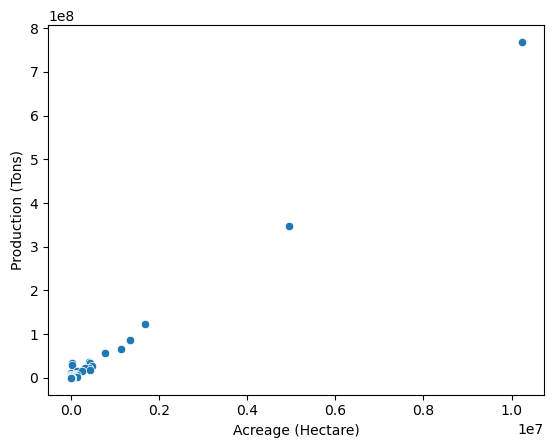

In [217]:
sns.scatterplot(data = df, x = "Acreage (Hectare)", y = "Production (Tons)")

### Do Countries which yeild more Sugarcane per hectare produces more sugarcane in total?

Here we need to check correlation btw Yeild and Production

<Axes: >

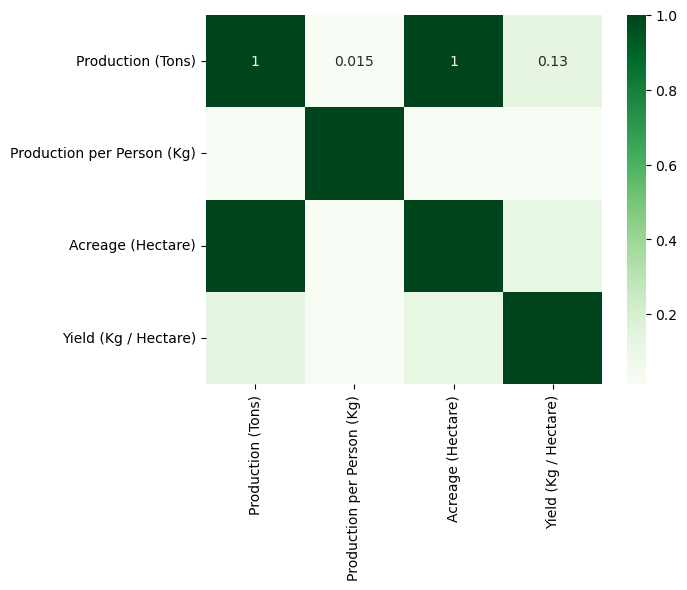

In [218]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "Greens")

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Production (Tons)'>

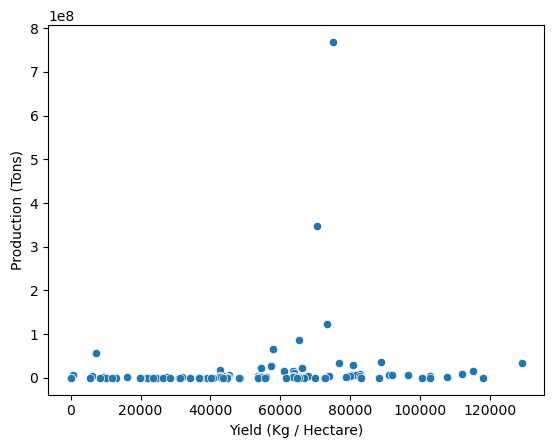

In [219]:
sns.scatterplot(data = df, x = "Yield (Kg / Hectare)", y = "Production (Tons)")

## <B> Analysis for Continent

In [246]:

df_continent = df.groupby("Continent").sum(numeric_only = True)

In [247]:
df_continent.head()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
Continent,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5
Asia,721930425.0,1857769.303,10608319.0,1171871.4
Europe,5823.0,536.000,71.0,131870.9
North America,173995947.0,3796081.508,1581983.0,1082602.4
Oceania,36177574.0,28593.605,490909.0,162419.1


### Which Continent produces maximum sugarcane?

In [248]:
df["Continent"].value_counts() # Number of countries in each continent

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [249]:
df_continent["Production (Tons)"].sort_values(ascending = False)

Continent
South America    865588126.0
Asia             721930425.0
North America    173995947.0
Africa            89681472.0
Oceania           36177574.0
Europe                5823.0
Name: Production (Tons), dtype: float64

<Axes: xlabel='Continent'>

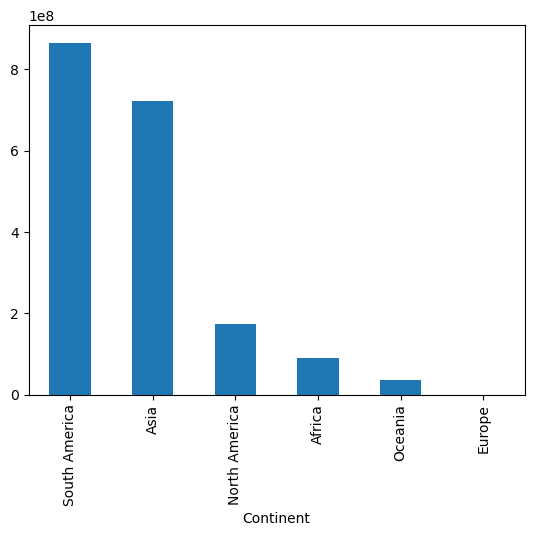

In [250]:
df_continent["Production (Tons)"].sort_values(ascending = False).plot(kind = "bar")

### Which Continent has largest land for production of sugarcane

In [251]:
df_continent["Acreage (Hectare)"].sort_values(ascending = False)

Continent
South America    11369236.0
Asia             10608319.0
North America     1581983.0
Africa            1439089.0
Oceania            490909.0
Europe                 71.0
Name: Acreage (Hectare), dtype: float64

<Axes: xlabel='Continent'>

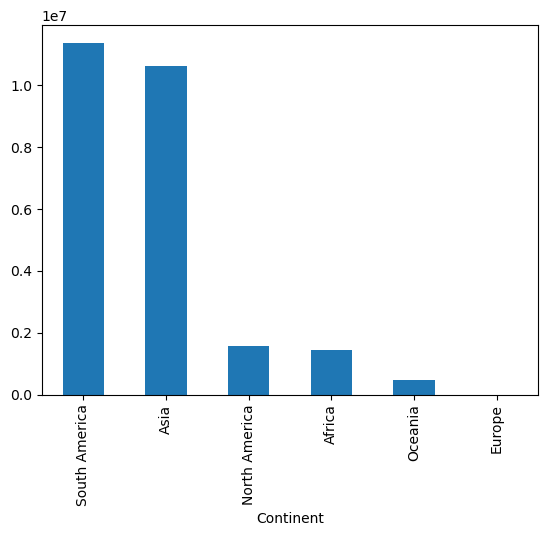

In [252]:
df_continent["Acreage (Hectare)"].sort_values(ascending = False).plot(kind = "bar")

### Do number of countries in a continent effects production of sugarcane?

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Production (Tons)'>

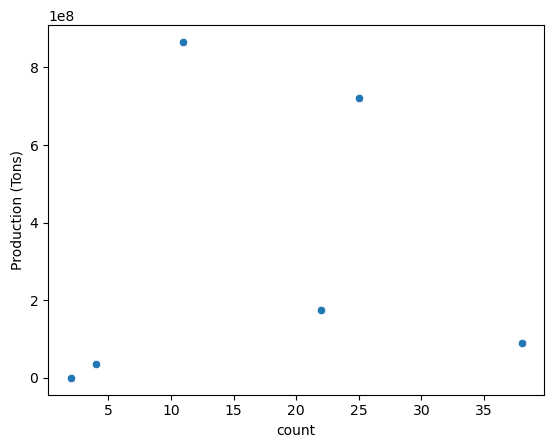

In [253]:
sns.scatterplot(data = df_continent, x = df["Continent"].value_counts(), y = "Production (Tons)")

In [255]:
# Adding another column indataframe to plot a heatmap for this.

df_continent1 = df_continent.copy()

df_continent1["Countries count"] = df["Continent"].value_counts() 

In [256]:
df_continent1.head()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Countries count
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


<Axes: >

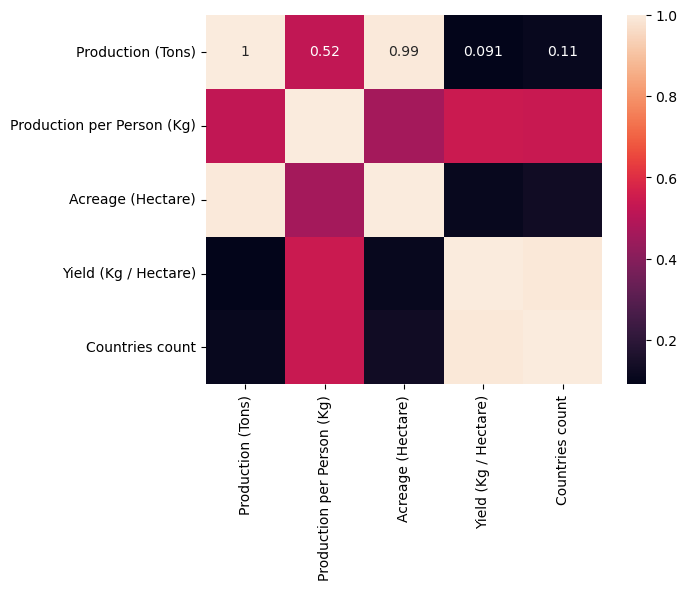

In [257]:
sns.heatmap(df_continent1.corr(numeric_only = True), annot = True)

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

([<matplotlib.axis.XTick at 0x180ab239410>,
 [Text(38, 0, 'Africa'),
  Text(25, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(22, 0, 'North America'),
  Text(4, 0, 'Oceania'),
  Text(11, 0, 'South America')])

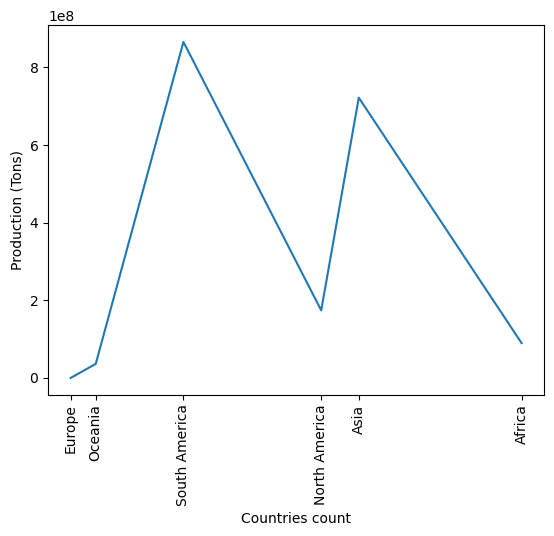

In [263]:
continent_names = df_continent1.index.to_list()

sns.lineplot(data = df_continent1, x = "Countries count", y = "Production (Tons)")
plt.xticks(df_continent1["Countries count"], continent_names, rotation = 90)

### Do Continent with highest land produces more sugarcane?

<Axes: >

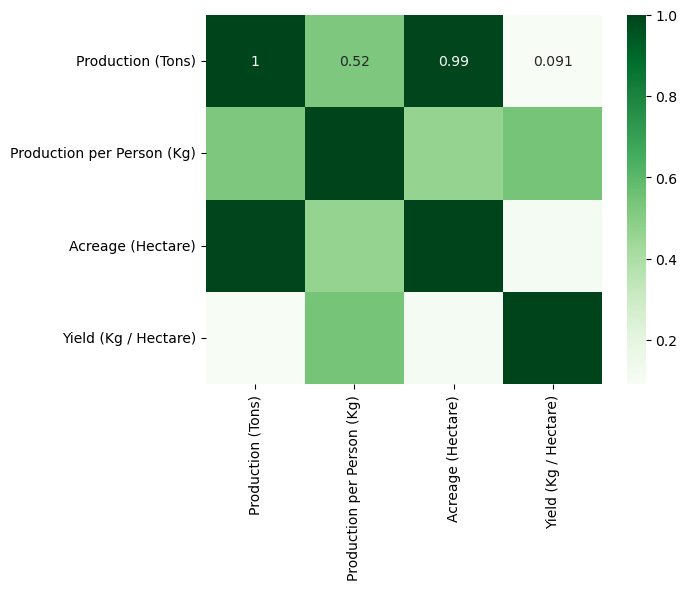

In [264]:
sns.heatmap(df_continent.corr(numeric_only = True), annot = True, cmap = "Greens")

In [267]:
df_continent1

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Countries count
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

([<matplotlib.axis.XTick at 0x180ac7a9710>,
 [Text(1439089.0, 0, 'Africa'),
  Text(10608319.0, 0, 'Asia'),
  Text(71.0, 0, 'Europe'),
  Text(1581983.0, 0, 'North America'),
  Text(490909.0, 0, 'Oceania'),
  Text(11369236.0, 0, 'South America')])

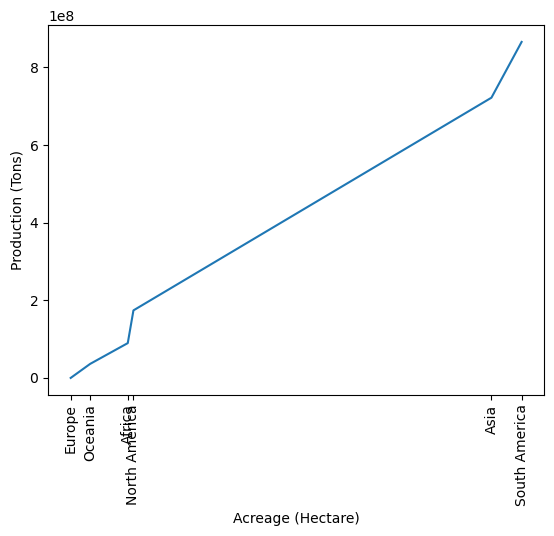

In [266]:
continent_names = df_continent1.index.to_list()

sns.lineplot(data = df_continent1, x = "Acreage (Hectare)", y = "Production (Tons)")
plt.xticks(df_continent1["Acreage (Hectare)"], continent_names, rotation = 90)

C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ASUS\anaconda3\envs\new environment\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


([<matplotlib.axis.XTick at 0x180ac752290>,
 [Text(1439089.0, 0, 'Africa'),
  Text(10608319.0, 0, 'Asia'),
  Text(71.0, 0, 'Europe'),
  Text(1581983.0, 0, 'North America'),
  Text(490909.0, 0, 'Oceania'),
  Text(11369236.0, 0, 'South America')])

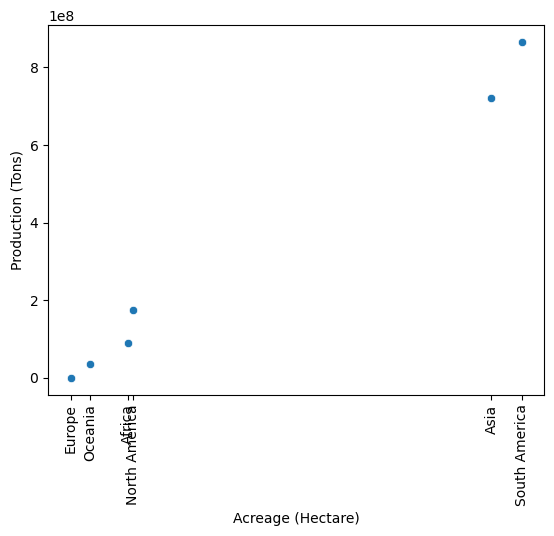

In [269]:
sns.scatterplot(data = df_continent1, x = "Acreage (Hectare)", y = "Production (Tons)")
plt.xticks(df_continent1["Acreage (Hectare)"], continent_names, rotation = 90)

### Production Distribution by Continent

<Axes: ylabel='Production (Tons)'>

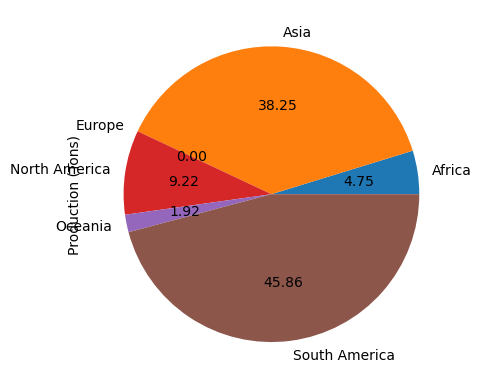

In [275]:
df_continent1["Production (Tons)"].plot(kind = "pie", autopct = "%0.2f")

In [280]:
df_continent1.head()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Countries count
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4


([<matplotlib.patches.Wedge at 0x180ac809a10>,
 [Text(1.0877667222245335, 0.1635957151666717, 'Africa'),
  Text(0.07756237614628037, 1.0972620825520871, 'Asia'),
  Text(-0.9953747131879451, 0.4682191584568236, 'Europe'),
  Text(-1.0876393486127889, 0.1644404066801961, 'North America'),
  Text(-1.0781200662218362, -0.21830511402581473, 'Oceania'),
  Text(0.14259959472258596, -1.090717816662474, 'South America')],
 [Text(0.5933273030315637, 0.08923402645454818, '4.75'),
  Text(0.042306750625243826, 0.5985065904829565, '38.25'),
  Text(-0.5429316617388791, 0.2553922682491765, '0.00'),
  Text(-0.5932578265160666, 0.08969476728010696, '9.22'),
  Text(-0.588065490666456, -0.11907551674135347, '1.92'),
  Text(0.07778159712141051, -0.594936990906804, '45.86')])

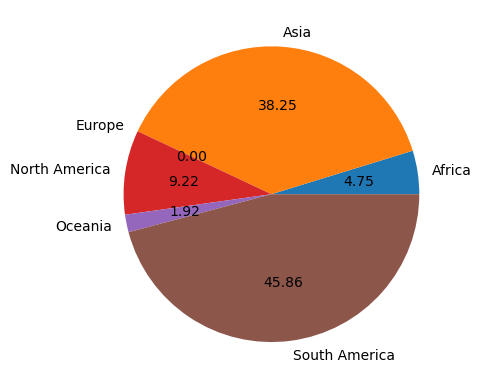

In [287]:
plt.pie(data = df_continent1, x = "Production (Tons)", labels = df_continent1.index.to_list(), autopct = "%0.2f")


### Correlation

In [270]:
df_continent1.corr(numeric_only =True)

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare),Countries count
Production (Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production per Person (Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage (Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield (Kg / Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Countries count,0.109244,0.540086,0.132817,0.989712,1.000000
